In [2]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

In [68]:
def connected_components(frozen: npt.NDArray[np.bool_]) -> npt.NDArray[np.int_]:
    """get a boolean mask (1=frozen, 0=lake) and return a tensor of the same shape
    with each element being the index of the connected component the cell belongs to"""
    components = np.arange(1, frozen.size + 1, dtype=np.int_).reshape(frozen.shape)
    components[~frozen] = 0
    changes = np.ones_like(components, dtype=np.bool_)
    while changes.sum() > 0:
        adj = components.copy()
        adj[1:, :] = np.maximum(adj[1:, :], components[:-1, :])
        adj[:-1, :] = np.maximum(adj[:-1, :], components[1:, :])
        adj[:, 1:] = np.maximum(adj[:, 1:], components[:, :-1])
        adj[:, :-1] = np.maximum(adj[:, :-1], components[:, 1:])
        changes = adj[frozen] > components[frozen]
        components[frozen] = adj[frozen]
    for i, u in enumerate(np.unique(components)):
        components[components == u] = i
    return components

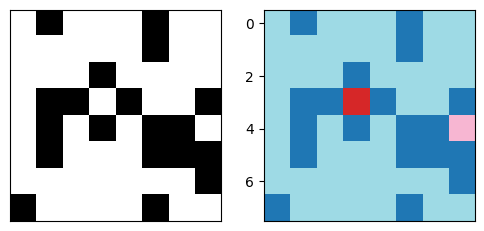

In [74]:
frozen = np.random.rand(8,8) > 0.4
components = connected_components(frozen)
plt.figure(figsize=(6, 3))
plt.subplot(121)
plt.imshow(frozen, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(components, cmap="tab20")
plt.xticks([])
plt.show()

In [ ]:
import sys
import matplotlib.pyplot as plt
sys.path.append("..")
from mango.environments import frozen_lake

params = dict(map_name="RANDOM", p=None, shape=(4, 4), seed=0)
env = frozen_lake.CustomFrozenLakeEnv(**params)
env = frozen_lake.wrappers.ReInitOnReset(env, **params)
env = frozen_lake.wrappers.TensorObservation(env)
for i in range(10):
    obs, info = env.reset()
    print(f"Observation:\n {obs.__repr__()}")
    plt.figure(figsize=(3, 3))
    plt.title(f"Environment")
    plt.imshow(env.unwrapped.render())
    plt.xticks([])
    plt.yticks([])
    plt.show()